# Machine Learning Tutorial Part 1 - Regression
<a href=https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v>Sentdex MLT</a>

Input GOOGLE stock prices for regression analysis using SKLEARN

- LinearRegression
- LinearRegression with MultiProcessing
- SVM with Linear Kernel
- SVM with Polynomial Kernel
- SVM with RBF Kernel

In [1]:
%matplotlib inline
from time import time
start = time()

from __future__ import print_function
import numpy as np
import pandas as pd
import quandl, math, datetime

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

''' `preprocessing` will be used to 'scale' the labels from 0 to 1 '''
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

import cPickle as pickle

print("Loading necessary libraries took {0:.2e} seconds".format(time() - start))

Loading necessary libraries took 1.78e+01 seconds


In [2]:
start = time()

df0  = quandl.get('WIKI/GOOG')

print("Downloading the DATA took {0:.2e} seconds".format(time() - start))

In [3]:
start = time()
# df  = pd.DataFrame.copy(df0[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']])

df0['HL_PCT']    = (df0['Adj. High'] - df0['Adj. Low'])   / df0['Adj. Close'] * 100.0
df0['PCT_change']= (df0['Adj. Close'] - df0['Adj. Open']) / df0['Adj. Open']  * 100.0

df  = pd.DataFrame.copy(df0[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']])

forecast_col    = 'Adj. Close'
df.fillna(-99999, inplace=True) # fill "Not Applicable" (usually NaNs) with "-99999" in place

percentchange   = 0.1 # predict 1% forward from current data set
forecast_out    = int(math.ceil(percentchange*len(df)))

df['label']     = df[forecast_col].shift(-forecast_out)

# df.dropna(inplace=True) # this causes an error later
print("Setting up the DataFrame took {0:.2e} seconds".format(time() - start))

Setting up the DataFrame took 8.43e-03 seconds


In [140]:
''' Define X and Y '''
''' Preprocessing can add to processing time 
        because you have to rescale testing data and prediction data 
        alongside training data for a proper scaling

    With HF Trading, you would definitely skip this step
'''

start = time()

# X   = preprocessing.scale(X) # previous version

features= np.array(['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume', 'label'])
# features= ['Adj. Volume', 'label']
X_full  = np.array(df.drop(features[[4]], 1))
# X_full  = np.array(df.drop(['label'], 1))
X_pp    = preprocessing.scale(X_full)
X_lately= X_pp[-forecast_out:]
X       = X_pp[:-forecast_out:]

y   = np.array(df.dropna()['label'])             # labels are the `labels`

X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X, y, test_size=0.2)

print("Setting up the Features and Labels took {0:.2e} seconds".format(time() - start))

Setting up the Features and Labels took 2.85e-03 seconds


In [5]:
''' LinearRegression '''
start = time()

clfLR   = LinearRegression() # default
clfLR.fit(X_train, y_train)

# with open('linearRegression.pickle', 'wb') as f_out:
#     pickle.dump(clfLR, f_out)
#     f_out.close()

# with open('linearRegression.pickle', 'rb') as f_in:
#     clfLR_pickle = pickle.load(f_in)

accuracy_LR = clfLR.score(X_test,y_test)*100.0
runtime_LR  = time() - start
print("Linear Regression took {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_LR, accuracy_LR))

Linear Regression took 1.08e-01 seconds, with an accuracy of 57.02%


In [6]:
''' LinearRegression with Multiprocessing'''
start = time()

clfLRmp = LinearRegression(n_jobs=-1) # multiprocessing
clfLRmp.fit(X_train, y_train)

accuracy_LRmp   = clfLRmp.score(X_test,y_test)*100.0
runtime_LRmp    = time() - start

print("Linear Regression with MP took {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_LRmp, accuracy_LRmp))

Linear Regression with MP took 1.57e-03 seconds, with an accuracy of 57.02%


In [7]:
''' SVM Regression ''' 
start = time()

clfSVM = svm.SVR()
clfSVM.fit(X_train, y_train)

accuracy_SVM    = clfSVM.score(X_test,y_test)*100.0
runtime_SVM     = time() - start
# print("The accuracy was {0:.2e}".format(accuracy))

print("SVM Linear Kernel took {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_SVM, accuracy_SVM))

SVM Linear Kernel took 1.25e-02 seconds, with an accuracy of 21.66%


In [8]:
''' SVM Regression Polynomial''' 
start = time()

clfSVMpoly  = svm.SVR(kernel='poly')
clfSVMpoly.fit(X_train, y_train)

accuracy_SVMpoly    = clfSVMpoly.score(X_test,y_test)*100.0
runtime_SVMpoly     = time() - start
# print("The accuracy was {0:.2e}".format(accuracy))

print("SVM Poly Kernel took {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_SVMpoly, accuracy_SVMpoly))

SVM Poly Kernel took 1.73e-02 seconds, with an accuracy of 3.07%


In [9]:
''' SVM Regression RBF (Gaussian)''' 
start = time()

clfSVMrbf   = svm.SVR(kernel='rbf')
clfSVMrbf.fit(X_train, y_train)

accuracy_SVMrbf    = clfSVMrbf.score(X_test,y_test)*100.0
runtime_SVMrbf     = time() - start
# print("The accuracy was {0:.2e}".format(accuracy))

print("SVM RBF Kernel took {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_SVMrbf, accuracy_SVMrbf))

SVM RBF Kernel took 9.91e-03 seconds, with an accuracy of 21.66%


In [10]:
print("Linear Regression took         {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_LR, accuracy_LR))
print("Linear Regression with MP took {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_LRmp, accuracy_LRmp))
print("SVM Linear Kernel took         {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_SVM, accuracy_SVM))
print("SVM Poly Kernel took           {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_SVMpoly, accuracy_SVMpoly))
print("SVM RBF Kernel took            {0:.2e} seconds, with an accuracy of {1:.2f}%".format(runtime_SVMrbf, accuracy_SVMrbf))

Linear Regression took         1.08e-01 seconds, with an accuracy of 57.02%
Linear Regression with MP took 1.57e-03 seconds, with an accuracy of 57.02%
SVM Linear Kernel took         1.25e-02 seconds, with an accuracy of 21.66%
SVM Poly Kernel took           1.73e-02 seconds, with an accuracy of 3.07%
SVM RBF Kernel took            9.91e-03 seconds, with an accuracy of 21.66%


Making Predictions
---

In [11]:
forecast_set = clfLR.predict(X_lately)
print(forecast_set, forecast_out, accuracy_LRmp)

[ 699.50169987  707.19830622  707.82991748  702.68644892  697.9074257
  721.01872353  708.3702478   710.74440937  705.02651291  706.44068513
  701.98357769  702.50476792  707.27432672  715.87541979  720.36670867
  714.92893885  728.1625665   721.53402151  723.42182198  727.26130678
  725.8454491   726.81719758  719.65220938  719.16441877  741.76763363
  734.92466403  732.17467525  739.52777148  734.50775013  724.04309226
  734.01273178  730.25704764  728.57248278  725.21880414  734.58354583
  737.20697682  732.68396915  740.11885371  749.99219559  753.95472283
  736.46549986  742.73751401  718.79329515  710.84758005  719.87365997
  706.747446    709.27006139  686.16412582  694.04309155  684.61620797
  693.06159745  691.81052472  708.52139742] 53 57.0210512604


In [12]:
df1             = pd.DataFrame.copy(df)
df1['Forecast'] = np.nan

import calendar
last_date   = df1.iloc[-1].name
last_unix   = calendar.timegm(last_date.timetuple())
one_day     = 86400
next_unix   = last_unix #+ one_day

Create Forecast Rows in DataFrame `df`
---

In [13]:
for fs in forecast_set:
    next_date   = datetime.datetime.fromtimestamp(next_unix)
    next_unix  += one_day
    df1.loc[next_date] = [np.nan for _ in range(len(df1.columns)-1)] + [fs]

Plot DataFrame Columns as Desired
---

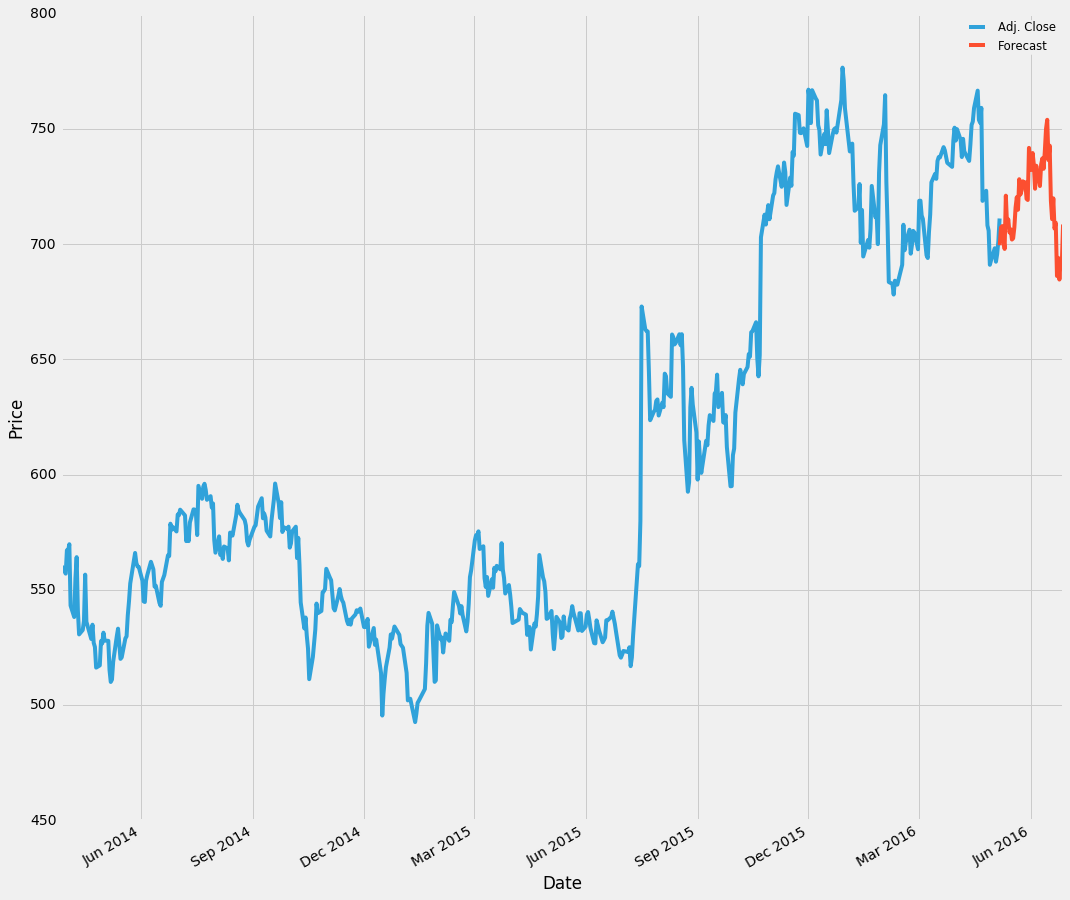

In [14]:
plt.figure(figsize=(16,16))
df1['Adj. Close'].plot()
df1['Forecast'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
# plt.xlim(df1.iloc[-10].name, df1.iloc[-1].name);
# plt.ylim(df1['Adj. Close'][-forecast_out-10], df1['Forecast'][-1])

In [15]:
print(df1['Forecast'][-forecast_out], df1['Adj. Close'][-forecast_out-1])
print((df1['Forecast'][-forecast_out] - df1['Adj. Close'][-forecast_out-1])/df1['Adj. Close'][-forecast_out-1]*100)

699.501699869 711.12
-1.63380303344


Programming Best Fit Line $y = m \cdot x + b$
---

$m = \frac{\bar{x}\cdot\bar{y} - \bar{x \cdot y}}{\left(\bar{x}\right)^2 - \bar{\left(x\right)^2}}$

and

$b = \bar{y} - m \cdot \bar{x}$


In [120]:
from statistics import mean

np.random.seed(42)

m0  = 1.0
b0  = 4.0
sig = 0.5
nPts= 1000

xs      = np.sort(np.random.uniform(0,6,nPts))
yerr    = np.random.normal(0,2*sig,xs.size)
ferr    = np.random.uniform(sig/2,sig,xs.size)
ys      = m0 * xs + b0 + yerr

<Container object of 3 artists>

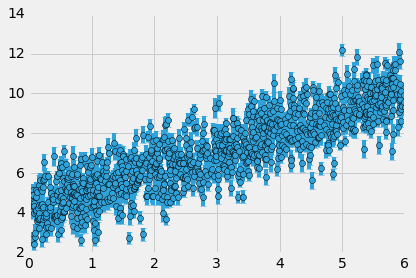

In [121]:
plt.errorbar(xs,ys, ferr, fmt='o')

Programming Best Fit Line
---

To Solve for 
$y = m \cdot x + b$
--- 


We can algebraically derive
$m = \frac{\bar{x}\cdot\bar{y} - \bar{x \cdot y}}{\left(\bar{x}\right)^2 - \bar{\left(x\right)^2}}$
---
and

$b = \bar{y} - m \cdot \bar{x}$
---

In [122]:
def best_fit_slope(xs,ys):
    xmean = mean(xs)
    ymean = mean(ys)
    xymean= mean(xs*ys)
    x2mean= mean(xs**2)
    m   = (xmean*ymean - xymean) / (xmean**2. - x2mean)
    return m

In [123]:
print(best_fit_slope(xs,ys))

0.990465452881


In [124]:
def best_fit_slope_intercept(xs,ys):
    m = best_fit_slope(xs,ys)
    return m, mean(ys) - m*mean(xs)

In [125]:
print(best_fit_slope_intercept(xs,ys))

(0.9904654528811454, 4.1269420631962408)


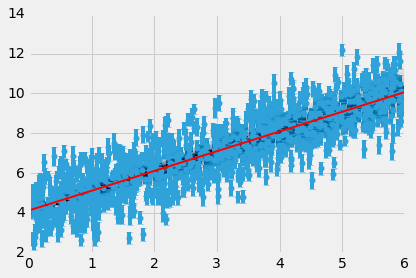

In [132]:
nLines  = 1000
mstd    = 1e-1
bstd    = 1e-1
mfit, bfit  = best_fit_slope_intercept(xs,ys)

for k in range(nLines):
    mrand = np.random.normal(mfit, mstd)
    brand = np.random.normal(bfit, bstd)
    plt.plot(xs, mrand*xs + brand, c='k', lw=2, alpha=0.005)

plt.errorbar(xs,ys, ferr, fmt='o', markeredgecolor='None')
plt.plot(xs, mfit*xs + bfit, c='r', lw=2)


$R^2$ Theory
---

$r^2 = 1 - \frac{SE(\hat{y})}{SE(\bar{y})}$
---

Such that

$SE(\hat{y}) = \sum\limits_i (y_i - f_i)^2$
---

and

$SE(\bar{y}) = \sum\limits_i (y_i - \bar{y})^2$
---

In [133]:
def rsquared(ys, model):
    SEybar = ((ys - mean(ys))**2).sum()
    SEyhat = ((ys - model)**2).sum()
    return 1 - SEyhat / SEybar

In [134]:
print(rsquared(ys, mfit*xs+bfit))

0.755070178859


0.755069034443 0.755070178859


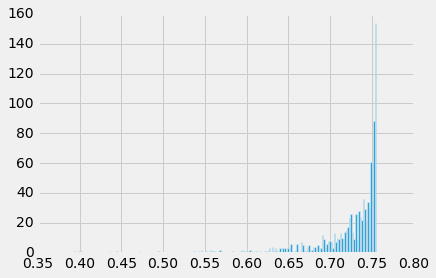

In [135]:
rsqArr = np.empty(nLines)
for k in range(nLines):
    mrand = np.random.normal(mfit, mstd)
    brand = np.random.normal(bfit, bstd)
    rsqArr[k]= rsquared(ys, mrand*xs+brand)

plt.hist(rsqArr, bins=nLines/5);
print(rsqArr.max(), rsquared(ys, mfit*xs+bfit))

0.755070178859 0.755070178859


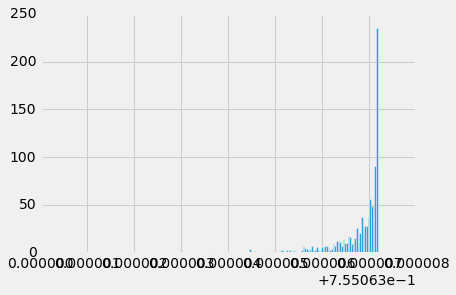

In [136]:
rsqTOO   = np.empty(ys.size)
for k in range(ys.size):
    xsNew= np.c_[xs[:k][:,None].T, xs[k+1:][:,None].T].ravel()
    ysNew= np.c_[ys[:k][:,None].T, ys[k+1:][:,None].T].ravel()
    mfitNew, bfitNew  = best_fit_slope_intercept(xsNew, ysNew)
    rsqTOO[k]= rsquared(ys, mfitNew*xs+bfitNew)

plt.hist(rsqTOO, bins=nLines/5);
print(rsqTOO.max(), rsquared(ys, mfit*xs+bfit))